In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [256]:
import os
path = os.getcwd() + '/dane1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [257]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [258]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


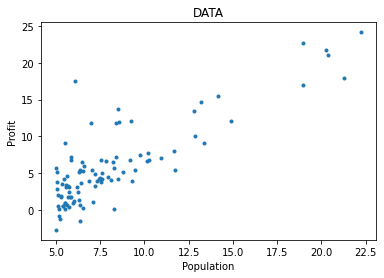

In [259]:
plt.plot(data['Population'], data['Profit'], '.')
plt.ylabel('Profit')
plt.xlabel('Population')
plt.title("DATA")
plt.show()

### Ex. 3 
#### In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [261]:
"""
It is possible to use df.insert()
"""
data_temp = pd.DataFrame({'1s':[1 for i in range(data.shape[0])]})

data_ones = pd.DataFrame({'1s' : data_temp['1s'].values,
                          'Population' : data['Population'].values,
                          'Profit': data['Profit'].values})
data_ones.head()


,1s,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


### Ex 4. 
#### We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 3). Check with the head function if your implementation is correct:

In [262]:
X = data_ones.drop(['Profit'], axis=1)
y = data_ones.drop(['1s', 'Population'], axis=1)

X_m = np.matrix(X.values)
y_m = np.matrix(y.values)
theta_m = np.matrix([0.0,0.0])


# print("x: \n", X_m,"\n\ny:\n", y_m, " \n\nTheta: \n", theta_m)

### Ex. 5 and 6 
#### The goal of linear regression is to find a straight line which accurately represents the relationship between population and profit. This is called the hypothesis function and it’s formulated as 𝑓(𝑥)→𝐑:

#### The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on X,y and parameter θ.

In [271]:
def computeCost(X, y, theta):
    f_x = np.dot(X, theta.transpose())
    sum_of_pow = np.sum(np.power(f_x-y, 2), axis=0)
    ret_val = sum_of_pow.sum() / (2*len(X)) 
    return ret_val

### Ex. 7
#### Test the cost function with (θ=0).

In [272]:
print(computeCost(X_m, y_m, theta_m))

32.072733877455676


### Ex. 8 
#### Please implement the gradient descent algorithm:

- the function returns optimized values θ and a vector of the cost function value for each iteration

In [273]:
def gradient_prosty(X, y, theta, alpha, it):
    # it - iteration nb.   
    cost = np.zeros(it)
     
    for i in range(it):       
        temp1 = np.multiply(theta, X)
        temp2 = temp1.sum(axis = 1)
        
        cost[i] = computeCost(X, y, theta)
        theta = np.matrix(np.array(theta[0] - (alpha/len(X))*np.sum((np.multiply((temp2 - y), X) ), axis = 0)))
        
    return theta, cost

##### Parameter initialization:

In [278]:
alpha = 0.01
it = 1000

### Ex. 9 
#### Please calculate the optimal parameters for the dataset.


In [279]:
[theta_out, cost_out] = gradient_prosty(X_m, y_m, theta_m, alpha, it)
theta_out

matrix([[-3.24140214,  1.1272942 ]])

### Ex. 10 
#### Please calculate the cost function for the given (zad.8) θ.


In [280]:
computeCost(X_m, y_m, theta_out)

4.515955503078912

### Ex. 11 
#### Plot the regression function and our dataset.


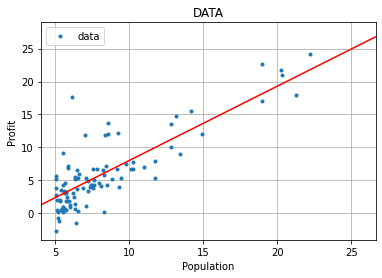

In [302]:
# create coefficients and min/max levels
c_x_min, c_x_max, c_y_min, c_y_max = 0.8, 1.2, 1.5, 1.2
min_x, max_x = data['Population'].min(axis=0), data['Population'].max(axis=0)
min_y, max_y = data['Profit'].min(axis=0), data['Profit'].max(axis=0)

# plot data
plt.plot(data['Population'], data['Profit'], '.')
plt.ylabel('Profit')
plt.xlabel('Population')
plt.title("DATA")
plt.legend(['data', 'linear regression'])

# create linear regression line
x_reg = np.linspace(min_x*c_x_min, max_x*c_x_max, 2)
y_reg = theta_out[0,1]*x_reg+theta_out[0,0]

# plot linear regression line
plt.plot(x_reg, y_reg, 'r-')

# take care of figure
plt.xlim(min_x*c_x_min, max_x*c_x_max)
plt.ylim(min_y*c_y_min, max_y*c_y_max)
plt.grid(True)

plt.show()



### Ex. 12 
#### Plot the relationship between the cost function and number of iterations.

Text(0, 0.5, 'Cost function')

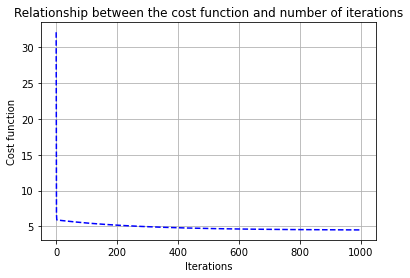

In [306]:
plt.plot(np.linspace(0, len(cost_out), len(cost_out)), cost_out, 'b--')
plt.grid(True)
plt.title("Relationship between the cost function and number of iterations")
plt.xlabel("Iterations")
plt.ylabel('Cost function')